In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Data_Analysis/BlackFriday.csv")

del df['Product_Category_2']
del df['Product_Category_3']

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [3]:
for col in df.columns:
    print(df[col].nunique(), end = '\t: ')
    print(col)

5891	: User_ID
3623	: Product_ID
2	: Gender
7	: Age
21	: Occupation
3	: City_Category
5	: Stay_In_Current_City_Years
2	: Marital_Status
18	: Product_Category_1
17959	: Purchase


In [4]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']) , len(df[df['Gender'] == 'F'])]}, index = ['Male', 'Female'])
data

,Ratio
Male,405380
Female,132197


In [5]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']) , len(df[df['Gender'] == 'F'])]}, index = ['Male', 'Female'])
data

,Ratio
Male,405380
Female,132197


<AxesSubplot:ylabel='Ratio'>

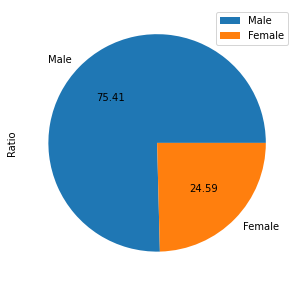

In [6]:
data.plot.pie(y = 'Ratio', autopct = '%.2f', figsize = (5,5))

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='Ratio'>

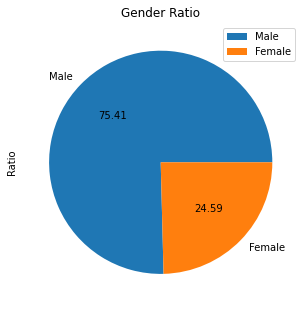

In [7]:
data.plot(kind = 'pie', y = 'Ratio', autopct = '%.2f', title = 'Gender Ratio', figsize = (5,6))

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='None'>

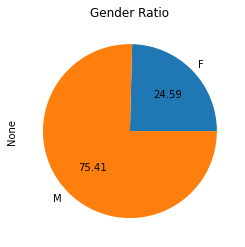

In [8]:
df.groupby('Gender').size().plot(kind = 'pie', y = 'Ratio', autopct = '%.2f', title  = 'Gender Ratio')

### Which Gender has purchased what amount?

<AxesSubplot:title={'center':'Purchase Ratio'}, ylabel='Purchase'>

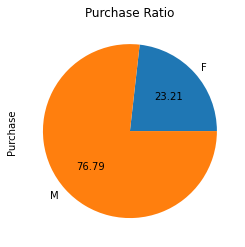

In [9]:
df.groupby('Gender')['Purchase'].sum().plot(kind = 'pie',title = 'Purchase Ratio', autopct = '%.2f')

### Total Product Distribution

<AxesSubplot:title={'center':'Total Product dist.'}, xlabel='Age'>

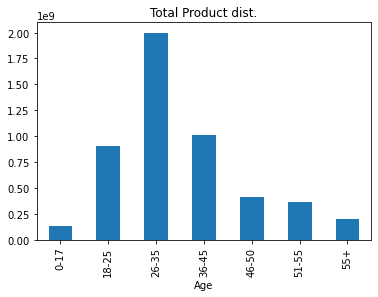

In [10]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar', x = 'Age', title = 'Total Product dist.')

### Unique Product Dist. by respective Age groups

In [11]:
df.groupby('Age')['Product_ID'].nunique()

Age
0-17     2300
18-25    3213
26-35    3419
36-45    3318
46-50    3099
51-55    2877
55+      2573
Name: Product_ID, dtype: int64

In [12]:
df[df['Age'] == '55+']['Product_ID'].nunique()

2573

In [13]:
lst = []

for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])

data = pd.DataFrame(lst, columns = ['Age', 'Unique_Products'])
data

,Age,Unique_Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


### Total purchase by respective age groups

<AxesSubplot:title={'center':'Amount spent by respective Age groups'}, xlabel='Age'>

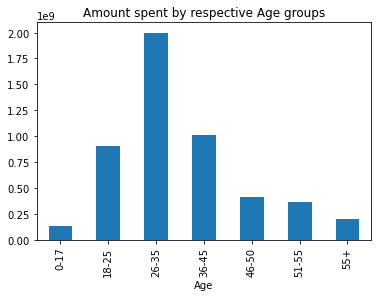

In [14]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', title = 'Amount spent by respective Age groups', x = 'Age')

### Average amount by respective Age groups

<AxesSubplot:title={'center':'Average amount by respective age groups'}, xlabel='Age'>

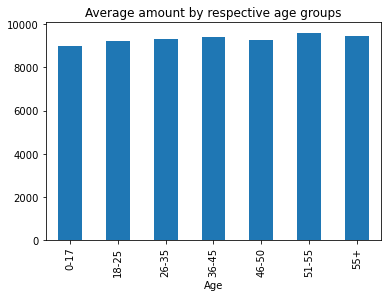

In [15]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', title = 'Average amount by respective age groups', x = 'Age')

In [ ]:
sns.countplot(x = df['City_Category'], hue = df['Purchase'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

### Total no. of products purchased in each city

In [ ]:
df.groupby('City_Category').size().plot(kind = 'bar', figsize = (10,4))  #using groupby and plot

In [ ]:
sns.countplot(x = df['City_Category'], hue = df['Purchase'])